# Setup

In [1]:
import os
import pickle
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#from scipy.stats import# f_oneway, kruskal


# options for display setting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False) 

In [2]:
# DATASET = '/Users/iduli/Desktop/Ch2_25_Scientific_Data/Final/Dataset_publish' # change the dataset link
DATASET = '../K-EmoWorker'

In [3]:
META = os.path.join(DATASET, 'META')
general_information = 'meta.csv'
meta = pd.read_csv(os.path.join(META, general_information), index_col=None)

LABELS = os.path.join(DATASET, 'LABELS')
label = os.path.join(LABELS, 'label.pkl')
with open(label, 'rb') as f:
  LABEL = pickle.load(f)

# Overall distribution according to the scenario (neutral, swearing, shouting)

In [4]:
def map_conditions(meta_df, label_dict):
    mapped_data = []
    for pnum, participant_data in label_dict.items():
        order_type = meta_df.loc[meta_df['Pnum'] == pnum, 'order_type'].values
        if len(order_type) == 0:
            continue  # Skip if the corresponding pnum is not in meta
        order_type = order_type[0]

        # Mapping conditions based on order_type
        condition_map = {
            "c1": "normal",
            "c2": "shouting" if order_type == 1 else "swearing",
            "c3": "swearing" if order_type == 1 else "shouting"
        }

        # Data transformation
        for condition_key, condition_name in condition_map.items():
            if condition_key in participant_data:
                condition_data = participant_data[condition_key]
                for measure in ['valence', 'arousal', 'stress', 'suppression']:
                    if measure in condition_data:
                        values = condition_data[measure].get(measure, [])
                        mapped_data.extend([
                            {"Pnum": pnum, "Condition": condition_name, "Measure": measure, "Value": v}
                            for v in values
                        ])
    
    return pd.DataFrame(mapped_data)

df = map_conditions(meta, LABEL)

In [5]:
# Calculate statistics for each Measure (valence, arousal, stress, suppression) by condition
condition_stats = df.groupby(["Condition", "Measure"])["Value"].agg(["min", "max", "mean", "std"]).reset_index()
condition_stats[condition_stats['Measure'] == 'arousal']

,Condition,Measure,min,max,mean,std
0,normal,arousal,1.0,9.0,4.391476,1.761286
4,shouting,arousal,1.0,9.0,5.862857,2.250323
8,swearing,arousal,1.0,9.0,5.248228,2.072902


In [6]:
# per person 
individual_stats = df.groupby(["Pnum", "Condition", "Measure"])["Value"].agg(["min", "max", "mean", "std"]).reset_index()
individual_stats[individual_stats['Measure']== 'stress'] 

,Pnum,Condition,Measure,min,max,mean,std
1,1,normal,stress,1.0,14.0,10.569272,2.265874
5,1,shouting,stress,1.0,18.0,16.900876,2.389103
9,1,swearing,stress,1.0,13.0,10.042414,2.719708
13,2,normal,stress,1.0,13.0,4.064642,2.334450
17,2,shouting,stress,1.0,20.0,18.575132,3.802206
21,2,swearing,stress,1.0,18.0,11.322688,4.499744
25,3,normal,stress,1.0,2.0,1.270662,0.444389
29,3,shouting,stress,1.0,20.0,18.709987,4.764378
33,3,swearing,stress,1.0,20.0,16.039539,5.327267
37,4,normal,stress,1.0,20.0,9.074373,5.998194


## stress, emotional workload

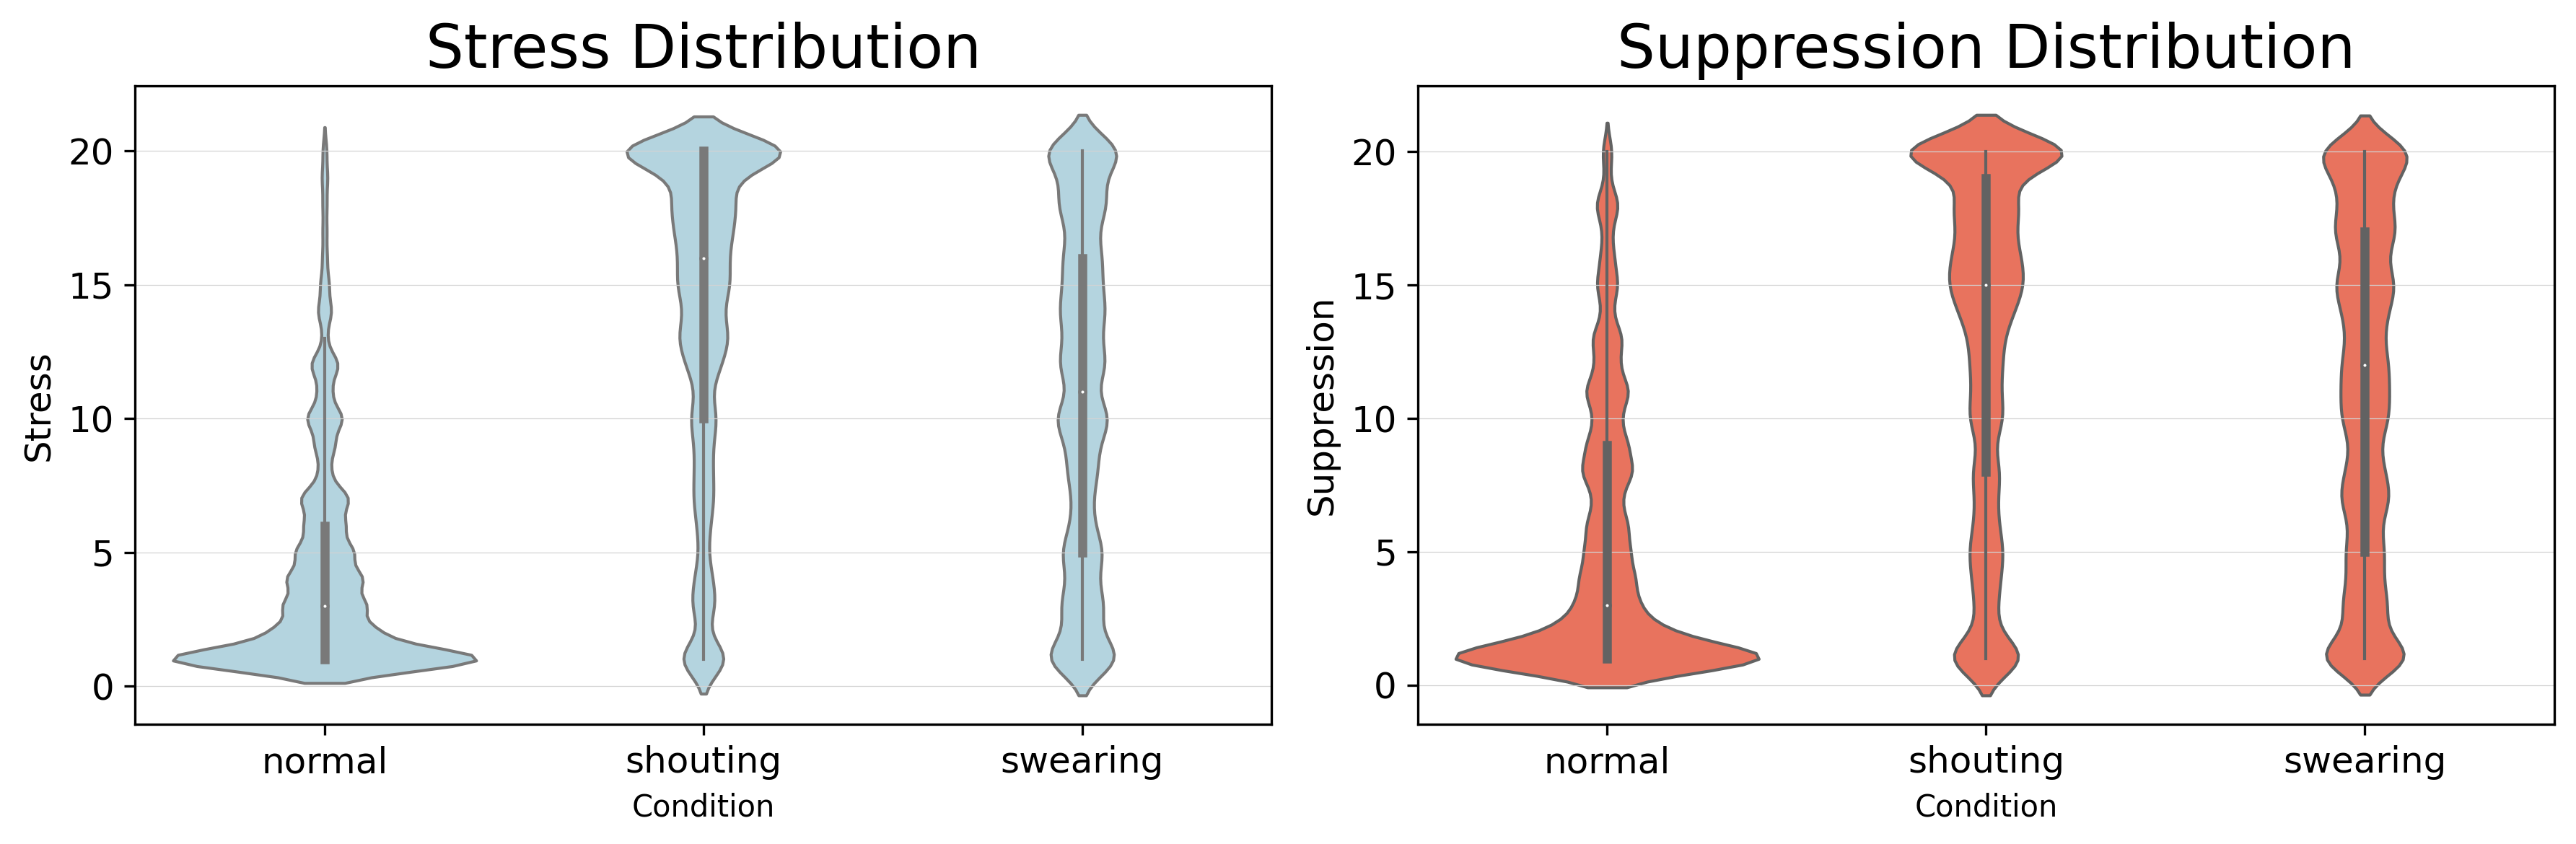

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi = 300)  
measures = ["stress", "suppression"]

box_color =["lightblue","#FF6347"] 

for i, measure in enumerate(measures):
    ax = axes[i]
    sns.violinplot(x="Condition", y="Value", data=df[df["Measure"] == measure], ax=ax, 
                   color=box_color[i], inner="box", linewidth=1, width=0.8) 

    ax.grid(axis='y', color='lightgray', linestyle='-', linewidth=0.3)
    
    ax.set_title(f"{measure.capitalize()} Distribution", fontsize=20)
    ax.set_ylabel(measure.capitalize(), fontsize=12)
    ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()


## Emotion 

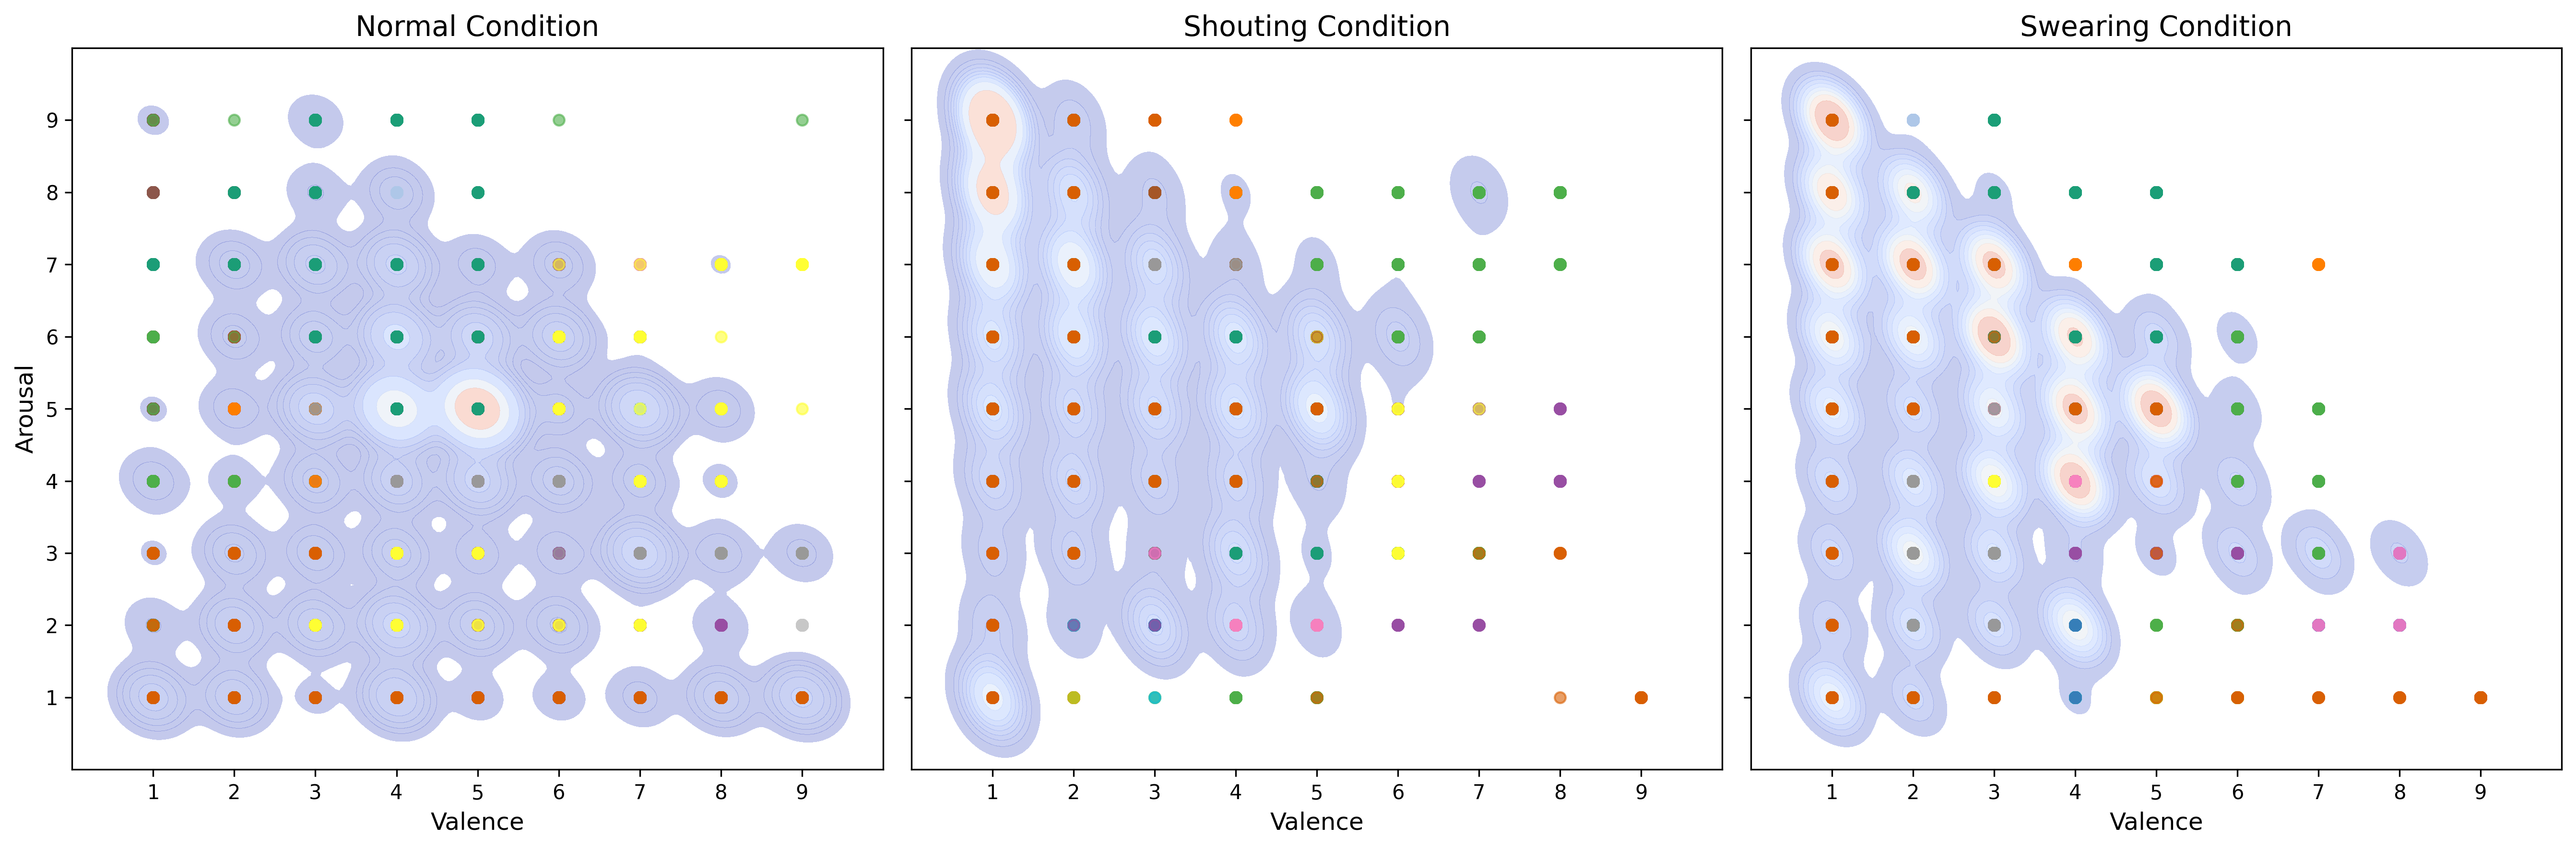

In [8]:
pnum_list = sorted(LABEL.keys())  
pnum_colors = sns.color_palette("tab20", 20) + sns.color_palette("Set1", 9) + sns.color_palette("Dark2", 2)
pnum_color_map = {pnum: pnum_colors[i % len(pnum_colors)] for i, pnum in enumerate(pnum_list)}

# Collect data per participant (extract directly without merging)
condition_data = {"normal": {}, "shouting": {}, "swearing": {}}  # {pnum: (valence_list, arousal_list)}

for pnum in LABEL.keys():
    # Retrieve order_type
    order_type = meta.loc[meta["Pnum"] == pnum, "order_type"].values
    if len(order_type) == 0:
        continue  # Skip if the corresponding Pnum is not in meta
    order_type = order_type[0]

    # Mapping conditions based on order_type
    condition_map = {
        "c1": "normal",
        "c2": "shouting" if order_type == 1 else "swearing",
        "c3": "swearing" if order_type == 1 else "shouting"
    }

    # Save data according to the corresponding condition
    for c_key, c_name in condition_map.items():
        if c_key in LABEL[pnum]:
            valence_data = LABEL[pnum][c_key].get("valence", {}).get("valence", [])
            arousal_data = LABEL[pnum][c_key].get("arousal", {}).get("arousal", [])
            
            min_len = min(len(valence_data), len(arousal_data))  # Match data length
            if min_len > 0:
                if pnum not in condition_data[c_name]:
                    condition_data[c_name][pnum] = ([], [])
                condition_data[c_name][pnum][0].extend(valence_data[:min_len])
                condition_data[c_name][pnum][1].extend(arousal_data[:min_len])


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, dpi = 300)
# Add scatter plot and KDE plot to each condition-specific subplot
for i, (condition, pnum_data) in enumerate(condition_data.items()):
    ax = axes[i]
    
    # Add KDE contour plot (apply vivid colors)
    all_valences = [v for pnum in pnum_data for v in pnum_data[pnum][0]]
    all_arousals = [a for pnum in pnum_data for a in pnum_data[pnum][1]]
    
    if all_valences and all_arousals:
        sns.kdeplot(x=all_valences, y=all_arousals, fill=True, alpha=0.3, levels=10, ax=ax, cmap="coolwarm")

    # Add scatter plot per participant (different markers for each Pnum)
    for pnum, (valence_list, arousal_list) in pnum_data.items():
        if valence_list and arousal_list:
            ax.scatter(valence_list, arousal_list, 
                       alpha=0.6, color=pnum_color_map[pnum], s=30, label=f"P{pnum}" if pnum < 5 else None)  # Display legend for up to 5 participants only

    # Set axis labels and title
    ax.set_xlabel("Valence", fontsize=12)
    if i == 0:
        ax.set_ylabel("Arousal", fontsize=12)
    ax.set_title(f"{condition.capitalize()} Condition", fontsize=14)

    # Adjust axis ticks (range 0~10 but only display 1~9)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_xticks(range(1, 10))
    ax.set_yticks(range(1, 10))

# Adjust overall layout
plt.tight_layout()
plt.show()
